# Visualizing the loss and the error of the model

Given our diagnostics data, we want to know where exactly our models performs badly. From the 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

## Quattro Stagioni

Performance | total score | SIC | SOD | FLOE
---|---|---|---|---
`Pizza Quattro Stagioni` | 77.7 | 83.82 | 77.50 | 66.13

`Pizza Quattro Stagioni` - 6-lvl u-net with transfer learning from `Pizza Marinara` (half the learning rate), regression loss, diagnostics output and reweighting sampler: `40 epochs`, `'unet_conv_filters': [16, 32, 32, 32, 32, 32]`.

* compared to the `Pizza Quattro Formaggi` we can see that with less `unet_conv_filters` and less epochs we perform better! This is counterInt64uitive, but we hypothesize that the reason might be that with transfer learning a model like this performs better -> maybe train `Pizza Quattro Formaggi` from `Pizza Quattro Stagioni`
* the best model was in epoch 33
* the columns of test were wrongly attached, so no data from test (or use the data from mlflow)

In [29]:
header_columns = ['sentinel_mission_identifier',
                    'image_acquisition_start_date',
                    'image_acquisition_start_date_year', 'image_acquisition_start_date_month', 'image_acquisition_start_date_hour',
                    'row_rand', 'col_rand', 'sample_n',
                    'icechart_provider', 'location',
                    'epoch_no', 'type', 'score_combined',
                    'loss_SIC', 'loss_SOD', 'loss_FLOE', 'loss_combined',
                    'score_SIC', 'ice_characteristcs_SIC',
                    'score_SOD', 'ice_characteristcs_SOD',
                    'score_FLOE', 'ice_characteristcs_FLOE',]
dtypes = {'sentinel_mission_identifier': str,
            'image_acquisition_start_date_year': 'Int64',
            'image_acquisition_start_date_month': 'Int64',
            'image_acquisition_start_date_hour': 'Int64',
            'row_rand': 'Int64',
            'col_rand': 'Int64',
            'sample_n': 'Int64',
            'epoch_no': 'Int64',
            'type': str,
            'score_combined': float,
            'loss_SIC': float,
            'loss_SOD': float,
            'loss_FLOE': float,
            'loss_combined': float,
            'score_SIC': float,
            'ice_characteristcs_SIC': float,
            'score_SOD': float,
            'ice_characteristcs_SOD': float,
            'score_FLOE': float,
            'ice_characteristcs_FLOE': float,
            }
metadata_stagioni = pd.read_csv('metadata_runs/pizza_quattrostagioni_metadata.csv',
                                names=header_columns, dtype=dtypes,  # parse_dates='image_acquisition_start_date',
                                index_col=False, header=0)
metadata_stagioni.drop(labels=[0], axis=0, inplace=True)
metadata_stagioni.info()

# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160399 entries, 1 to 160399
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   sentinel_mission_identifier         160399 non-null  object 
 1   image_acquisition_start_date        160399 non-null  object 
 2   image_acquisition_start_date_year   160399 non-null  Int64  
 3   image_acquisition_start_date_month  160399 non-null  Int64  
 4   image_acquisition_start_date_hour   160399 non-null  Int64  
 5   row_rand                            159999 non-null  Int64  
 6   col_rand                            159999 non-null  Int64  
 7   sample_n                            159999 non-null  Int64  
 8   icechart_provider                   160399 non-null  object 
 9   location                            160399 non-null  object 
 10  epoch_no                            160399 non-null  Int64  
 11  type                      

In [31]:
with pd.option_context('display.max_columns', None):  # 'display.max_rows', None
    display(metadata_stagioni.tail(20))

,sentinel_mission_identifier,image_acquisition_start_date,image_acquisition_start_date_year,image_acquisition_start_date_month,image_acquisition_start_date_hour,row_rand,col_rand,sample_n,icechart_provider,location,epoch_no,type,score_combined,loss_SIC,loss_SOD,loss_FLOE,loss_combined,score_SIC,ice_characteristcs_SIC,score_SOD,ice_characteristcs_SOD,score_FLOE,ice_characteristcs_FLOE
160380,S1B,2019-06-19 18:51:15,2019,6,18,2039,2012,7,dmi,CentralEast,39,train,NaN,1.378198,0.611799,0.208274,2.198271,NaN,NaN,NaN,NaN,NaN,NaN
160381,S1B,2020-11-12 08:04:07,2020,11,8,3773,457,8,dmi,CentralEast,39,train,60.000000,1.378198,0.611799,0.208274,2.198271,0.000,0.000,100.000,0.0,100.000,0.0
160382,S1B,2020-11-12 08:04:07,2020,11,8,3841,4703,1,dmi,CentralEast,39,train,NaN,1.127542,0.511934,0.551721,2.191197,NaN,NaN,NaN,NaN,NaN,NaN
160383,S1B,2020-06-10 21:40:40,2020,6,21,1596,4709,2,cis,SGRDINFLD,39,train,60.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,100.000,3.0,100.000,1.0
160384,S1B,2020-08-30 11:39:11,2020,8,11,1589,2389,3,cis,SGRDIFOXE,39,train,64.860000,1.127542,0.511934,0.551721,2.191197,54.673,6.000,86.687,3.0,41.581,1.0
160385,S1B,2018-04-28 09:39:37,2018,4,9,4042,1497,4,cis,SGRDINFLD,39,train,60.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,100.000,3.0,100.000,1.0
160386,S1B,2021-05-21 08:21:26,2021,5,8,3230,4708,5,dmi,SouthEast,39,train,12.079000,1.127542,0.511934,0.551721,2.191197,-46.534,6.000,76.732,3.0,0.000,1.0
160387,S1A,2020-01-31 10:18:05,2020,1,10,2628,786,6,cis,SGRDIEA,39,train,60.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,100.000,3.0,100.000,1.0
160388,S1B,2021-01-13 11:07:32,2021,1,11,1487,4351,7,cis,SGRDIFOXE,39,train,20.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,0.000,3.0,100.000,1.0
160389,S1B,2020-01-29 08:03:58,2020,1,8,2840,3238,8,dmi,CentralEast,39,train,0.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,0.000,3.0,0.000,1.0


In [49]:
metadata_stagioni_best = deepcopy(metadata_stagioni[(metadata_stagioni['epoch_no'] == 33) & (metadata_stagioni['type'] == 'train')])  # because test is wrongly saved here
with pd.option_context('display.max_columns', None):
    metadata_stagioni_best

- [ ] make new columns in which the loss is weighted by the number of non-nan loss entries per location, with loss_type column
- [ ] -"- for icechart provider
- [ ] -"- for month
- [ ] -"- for ice characteristic classes

In [50]:
count_icechart_provider = metadata_stagioni_best.groupby('icechart_provider').count() # , 'image_acquisition_start_date_year', 'image_acquisition_start_date_month', 'location']).count()
count_month = metadata_stagioni_best.groupby('image_acquisition_start_date_month').count()
count_ice_characteristics_SOD = metadata_stagioni_best.groupby('ice_characteristcs_SOD').count()
count_ice_characteristics_FLOE = metadata_stagioni_best.groupby('ice_characteristcs_FLOE').count()
count_location = metadata_stagioni_best.groupby('location').count()
count_location

,sentinel_mission_identifier,image_acquisition_start_date,image_acquisition_start_date_year,image_acquisition_start_date_month,image_acquisition_start_date_hour,row_rand,col_rand,sample_n,icechart_provider,epoch_no,...,loss_SIC,loss_SOD,loss_FLOE,loss_combined,score_SIC,ice_characteristcs_SIC,score_SOD,ice_characteristcs_SOD,score_FLOE,ice_characteristcs_FLOE
location,,,,,,,,,,,,,,,,,,,,,
CapeFarewell,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,391,391,391,391,391,391
CentralEast,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,341,341,341,341,341,341
CentralWest,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,49,49,49,49,49,49
North,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,75,75,75,75,75,75
NorthAndCentralEast,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,31,31,31,31,31,31
NorthEast,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,52,52,52,52,52,52
NorthWest,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,238,238,238,238,238,238
Qaanaaq,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,52,52,52,52,52,52
SGRDIEA,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,...,1139,1139,1139,1139,1054,1054,1054,1054,1054,1054


In [55]:
count_location.sum()

sentinel_mission_identifier           4000
image_acquisition_start_date          4000
image_acquisition_start_date_year     4000
image_acquisition_start_date_month    4000
image_acquisition_start_date_hour     4000
row_rand                              4000
col_rand                              4000
sample_n                              4000
icechart_provider                     4000
epoch_no                              4000
type                                  4000
score_combined                        3622
loss_SIC                              4000
loss_SOD                              4000
loss_FLOE                             4000
loss_combined                         4000
score_SIC                             3622
ice_characteristcs_SIC                3622
score_SOD                             3622
ice_characteristcs_SOD                3622
score_FLOE                            3622
ice_characteristcs_FLOE               3622
dtype: int64

<AxesSubplot:xlabel='Count', ylabel='location'>

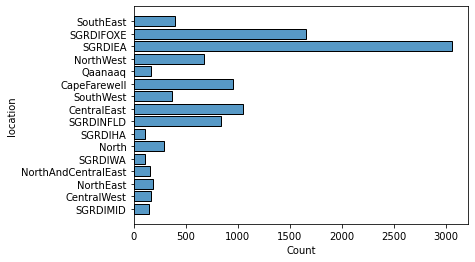

In [34]:
sns.histplot(data=metadata_stagioni_best, y='location', weights='loss_combined',
             multiple='stack', shrink=.8)